# Neural Networks: Multi-Class Classification

## Import relevant modules

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
np.set_printoptions(linewidth = 200)

import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt

## Get Data
  
This MNIST dataset contains a lot of examples:
* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples. 

Each example in the MNIST dataset consists of:
* A label is an integer from 0 to 9; 10 output classes.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`.
The data is already shuffled.

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Explore the data

MNIST data does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. 
* `x_train` and `x_test` are three-dimensional NumPy arrays.  
* Use `matplotlib.pyplot.imshow` to interpret the numeric array as an image.



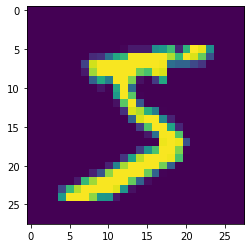

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [ ]:
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [ ]:
x_train[0][10][11]

154

## Normalize feature values

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

## Define a plotting function

To plot the accuracy curve

In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()

## Define model train function

In [ ]:
def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  return epochs, hist    

## Create and train model

Epoch 1/50
12/12 [==============================] - 2s 43ms/step - loss: 1.9483 - accuracy: 0.3577 - val_loss: 0.9875 - val_accuracy: 0.7574
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.9900 - accuracy: 0.7136 - val_loss: 0.5387 - val_accuracy: 0.8594
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 0.6763 - accuracy: 0.7930 - val_loss: 0.4163 - val_accuracy: 0.8892
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 0.5412 - accuracy: 0.8395 - val_loss: 0.3599 - val_accuracy: 0.9017
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 0.4728 - accuracy: 0.8626 - val_loss: 0.3233 - val_accuracy: 0.9113
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 0.4325 - accuracy: 0.8732 - val_loss: 0.3016 - val_accuracy: 0.9169
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 0.3985 - accuracy: 0.8837 - val_loss: 0.2824 - val_accuracy: 0.9211
Epoch 8/50
12

[0.14329248666763306, 0.9573000073432922]

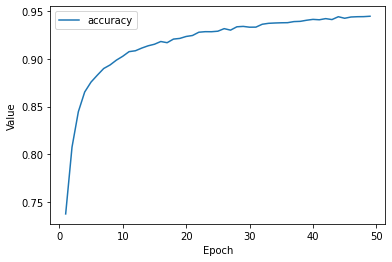

In [ ]:
# Set the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.Adam(lr=learning_rate)
)

# Train the model on the normalized training set.
epochs, hist = train_model(model, x_train_normalized, y_train, epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

## To optimize the model

* Experiment with the following:
  * number of hidden layers 
  * number of nodes in each layer
  * dropout regularization rate
  * learning rate
  * batch size 
  * number of epochs
* Searching for trends

### Guides

* Adding more nodes (at least until 256 nodes) to the first hidden layer improves accuracy.
* Adding a second hidden layer generally improves accuracy.
* When the model contains a lot of nodes, the model overfits unless the dropout rate is at least 0.5. 

### Sample observation
98.2% test accuracy with the following configuration:
* First hidden layer of 256 nodes
* Second hidden layer of 128 nodes
* Dropout regularization rate of 0.2


